# Introduction



**Problem Statement:**
Companies across industries are constantly seeking effective strategies to increase sales of a new product and revenue. To address this challenge, we aim to utilize data analytics and predictive modeling techniques to identify the key factors influencing customer purchasing decisions and develop a model that can accurately predict customer product purchase.

**Business Understanding:**
This project aims to serve to have a better understanding of customer base in order to optimize marketing efforts to boost sales. By leveraging a wealth of customer data, we can uncover patterns and insights that will enable to make data-driven decisions.

**Objective:**
The primary objective of this project is to develop a robust predictive model that can accurately determine whether a customer is likely to purchase a health insurance product. By doing so, we aim to empower our client with actionable insights to drive targeted marketing campaigns, improve customer segmentation, and ultimately increase sales.

**Methodology:**
To achieve our objective, we will employ logistic regression method, a widely used statistical modeling method for binary classification tasks. Logistic regression allows us to model the relationship between multiple independent variables and the binary outcome variable (customer purchase: yes or no). We will start by exploring and preprocessing the health insurance dataset, performing data cleaning, handling missing values if there are, and conducting feature engineering if required. Subsequently, we will split the data into training and testing sets for model development and evaluation. Next, we will implement several logistic regression models, evaluate their performances using appropriate metrics such as accuracy, precision, AUC score and ROC curve. Additionally, we will analyze the significance of individual variables to gain insights into the factors that strongly influence customer purchasing behavior.

**Expected Benefits:**
By applying advanced analytics techniques, our project aims to provide the following benefits to our client:

- Enhanced understanding of customer behavior: By analyzing the dataset and building a predictive model, we can identify the factors that significantly impact customer purchasing decisions. This insight will enable our client to tailor their marketing strategies, products, and customer service initiatives to effectively engage and convert potential customers.

- Targeted marketing campaigns: Armed with the predictive model, our clients can develop highly targeted and personalized marketing campaigns. By focusing their efforts on customers with a higher likelihood of purchasing, the company can optimize their resources, increase conversion rates, and achieve better return on investment (ROI).

- Improved customer segmentation: Through the analysis, we can identify distinct customer segments within the dataset based on their likelihood of making a purchase. This knowledge allows the client to develop tailored product offerings, customized marketing messages, and targeted incentives, thereby improving customer satisfaction and loyalty.

## Loading and Examining the Dataset

In [1]:
# import relevant libraries and load the dataset
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/Vlkn-da/DAV-6150/main/M7_Data.csv'

file = pd.read_csv(url)

file.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [2]:
# copy the dataset to preserve the original one
data = file.copy()

In [3]:
# basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


The columns are of numerical data types, except the tarhet variable, which is of the object type.

In [4]:
# shape of the dataset
data.shape

(14016, 15)

The dataset consists of 14016 rows and 15 columns, which is large enough for the logistic regression model.

In [5]:
# number of duplicate rows
data.duplicated().sum()

3008

There are 3008 duplicate records. We will romove them.

In [6]:
# remove the duplicates
data = data.drop_duplicates()

# check
data

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,N,1,16793,33,2,2,1,3,3,1,302.380331,229.457986,2,33,27
11004,N,99,16794,23,2,0,0,0,0,0,316.268616,228.518505,2,23,3
11005,N,1,16798,23,2,2,1,3,3,1,385.871241,236.665515,2,23,27
11006,N,99,16800,32,2,1,1,3,3,1,317.578868,226.899614,2,32,15


In [7]:
# check for missing values
data.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

There is no missing values in the dataset.

In [8]:
# summary statistics
data.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.0,11008.000000,11008.000000
mean,46.533612,27023.459938,34.845203,-724.143078,0.982649,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,2.0,34.845203,14.791788
std,48.292402,38576.841141,13.032781,26949.664365,0.939415,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,0.0,13.032781,11.272981
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,5480.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,2.0,24.000000,3.000000
50%,3.000000,11025.500000,31.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,2.0,31.000000,15.000000
75%,99.000000,16632.250000,42.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,2.0,42.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


In [9]:
data['contract'].value_counts()

2    11008
Name: contract, dtype: int64

In [10]:
print(data['city'].value_counts())

2      10769
0         20
1         17
8         17
9         16
       ...  
72         1
31         1
51         1
107        1
30         1
Name: city, Length: 65, dtype: int64


- 'contract' column only includes a single value. It can be removed.
- Overwhelming majority of 'city' column consists of index equals 2. This means that records in the dataset belongs mostly to one city. Due to lack of variance, we will not include 'city' variable in the models.
- Most of the columns are in categorical type.
- 'age' and 'age_P' has the same values of summary statistics. They must be identical columns. After we make it sure that in bivariate analysis, we will probably remove it as well. 

## Exploratory Data Analysis

We will first divide the dataset into two; categorical and numerical as they are performed on different visualization and operations.

In [11]:
# categorical variables
categorical_list = ['TARGET', 'loyalty', 'prod_A', 'type_A', 'type_B', 'prod_B']

cat_vars = data[categorical_list]

cat_vars

,TARGET,loyalty,prod_A,type_A,type_B,prod_B
0,Y,99,0,0,0,0
1,Y,1,1,3,3,1
2,Y,1,1,3,6,1
3,Y,99,0,0,0,0
4,Y,99,0,0,0,0
...,...,...,...,...,...,...
11003,N,1,1,3,3,1
11004,N,99,0,0,0,0
11005,N,1,1,3,3,1
11006,N,99,1,3,3,1


In [12]:
cat_vars['prod_B'].value_counts()

1    7180
0    3828
Name: prod_B, dtype: int64

In [13]:
# numerical values
numerical_list = ['age', 'age_P', 'turnover_A', 'turnover_B', 'LOR', 'lor_M' ]

num_vars = data[numerical_list]

num_vars

,age,age_P,turnover_A,turnover_B,LOR,lor_M
0,66,66,333.561114,264.721010,0,3
1,45,45,394.735699,284.904978,3,39
2,42,42,342.180990,1175.589721,2,27
3,31,31,453.757916,242.341754,0,3
4,62,62,384.577469,287.008370,0,3
...,...,...,...,...,...,...
11003,33,33,302.380331,229.457986,2,27
11004,23,23,316.268616,228.518505,0,3
11005,23,23,385.871241,236.665515,2,27
11006,32,32,317.578868,226.899614,1,15


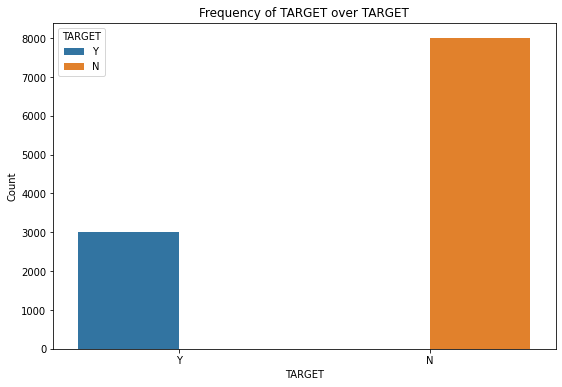

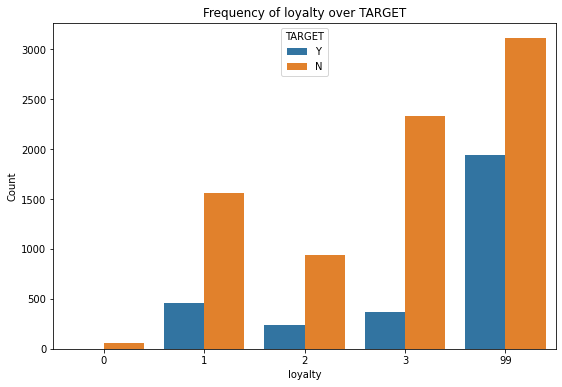

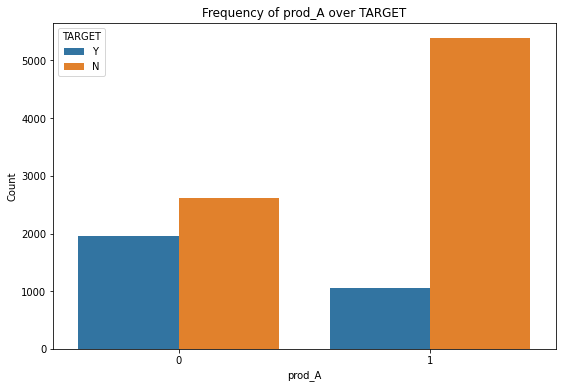

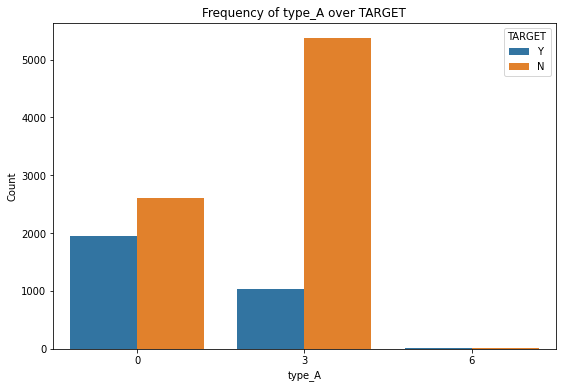

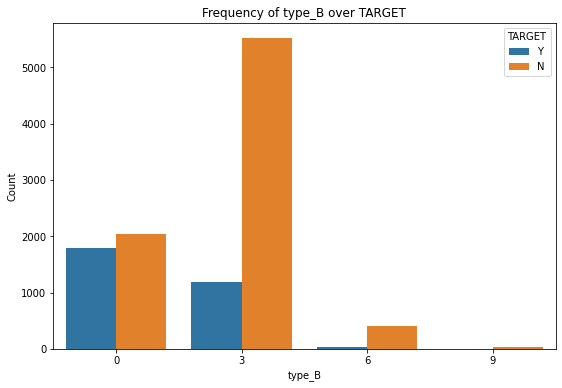

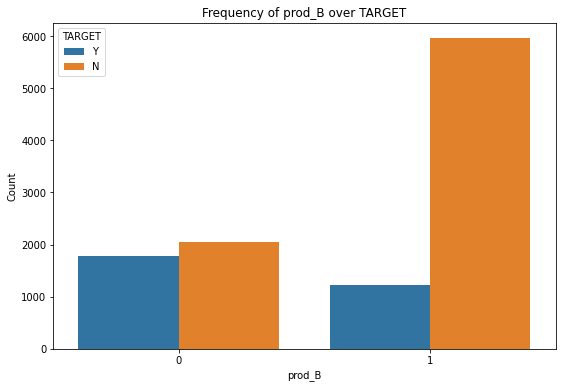

In [14]:
# distribution of categorical variables over the target variable

import matplotlib.pyplot as plt
import seaborn as sns


for col in cat_vars:
    plt.figure(figsize=(9, 6))
    sns.countplot(x=col, hue='TARGET', data=data)
    plt.title(f"Frequency of {col} over TARGET")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='TARGET', labels=['Y', 'N'])
    plt.show()

- There does not seem a pattern in the relationship between loyalty level and the target variable. However, proportionally, the customers who buy the products the most are in the undefined category (99).
- Proportionally, those who did not buy the products A and B tend to buy the new product more than those who did not.
- Proportionally, Type A and Type B levels are inversely related to buying behavior of the new product.ariables include a certain level of variability in themselves. This is because that imbalanced data can cause large coefficients which make it difficult to interpret.

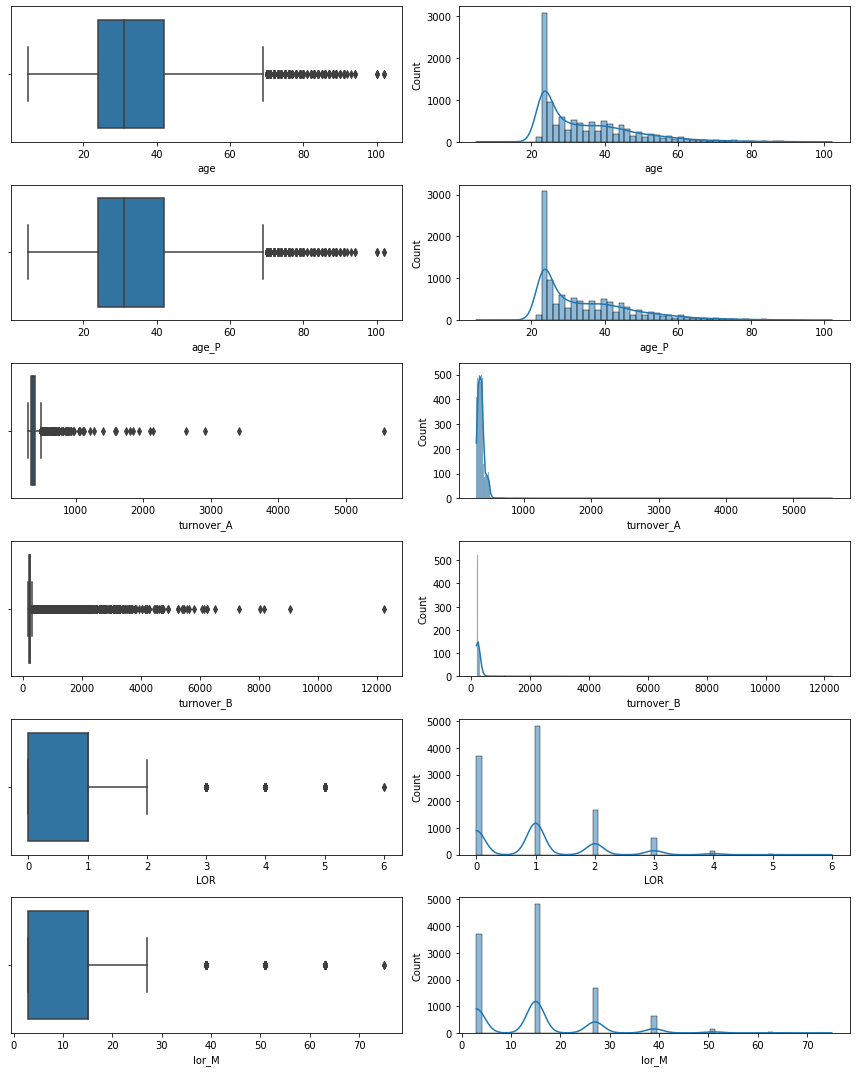

In [15]:
# Create subplots for box plots and histograms
fig, axes = plt.subplots(len(num_vars.columns), 2, figsize=(12, 15))

# Iterate over selected columns
for i, col in enumerate(num_vars):
    # Assigning a graph to each ax
    sns.boxplot(x = num_vars[col], ax=axes[i, 0])
    sns.histplot(data=num_vars, x=col, ax=axes[i, 1], kde=True)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
# Function to calculate percentage of outliers in a series
def calculate_outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))
    outlier_percentage = outlier_condition.sum() / len(series) * 100
    return outlier_percentage

# Calculate percentage of outliers for each numerical column
outlier_percentages = num_vars.apply(calculate_outlier_percentage)
outlier_percentages

age           2.189317
age_P         2.189317
turnover_A    3.633721
turnover_B    9.002544
LOR           7.285610
lor_M         7.285610
dtype: float64

- 'age' and 'age_P' have the same distribution, a right-skewed one.
- 'turnover_A' has a relatively normal distribution, while 'turnover_B' has a righ-skewed one. This is due to the outliers. 
- 'lor' and 'lor_M' have very similar distribution since they represent the same entity in different units. They have multi-modal distributions. They have also relatively high percent of outliers.
- Since outliers does not represent an anomaly, we will not handle them in the first model due to information loss concerns. However, in another model, we will transform data to decrease the percent of outliers and hope to get a better score, if the former models do not perform well.

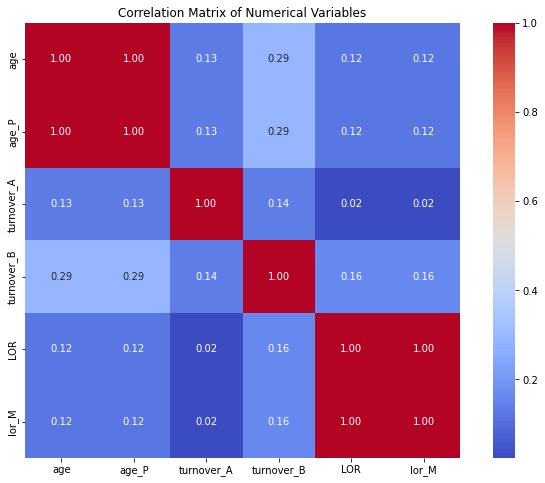

In [17]:
# Heatmap of numerical variables for checkign for multicolinearity

plt.figure(figsize=(12, 8))
sns.heatmap(num_vars.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

'LOR'-'lor_M' and 'age'-'age_P' are collinear to each other. Since 'lor_M' contains a more comprehensive information, we will keep it and leave 'LOR' off from the modelling data. 'age_P' should not have been identical to 'age', since they would be representing different information, age of customer and age of customer partner reslectively. However, they are identical and we will remove 'age_P' from the modelling dataset. Other than those, there are no variables having multicollinearity.

## Feature Selection and Data Preparation

- Based on the explanatory findings we will not include 'contract' column in the modelling, for it consist only of a single value. Other categorical variables influece the target variable. 
- We will remove 'LOR' and 'age_P' as mentioned above. 
- Since the dataset does not have lots of dimensions we do not need to apply dimensionality reduction techniques.
- Other variable are preserved in the dataset for modelling.

In [18]:
# update categorical variables
cat_vars = cat_vars.drop('TARGET', axis=1)

cat_vars

,loyalty,prod_A,type_A,type_B,prod_B
0,99,0,0,0,0
1,1,1,3,3,1
2,1,1,3,6,1
3,99,0,0,0,0
4,99,0,0,0,0
...,...,...,...,...,...
11003,1,1,3,3,1
11004,99,0,0,0,0
11005,1,1,3,3,1
11006,99,1,3,3,1


In [19]:
# get dummy categorical variables
cat_vars_dummy = pd.get_dummies(cat_vars, columns=['loyalty', 'prod_A', 'type_A', 'type_B', 'prod_B'])

# check
cat_vars_dummy

,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99,prod_A_0,prod_A_1,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9,prod_B_0,prod_B_1
0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1
2,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1
11004,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0
11005,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1
11006,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1


In [20]:
# update numerical variables
num_vars = num_vars.drop(columns=(['age_P', 'LOR']))

num_vars

,age,turnover_A,turnover_B,lor_M
0,66,333.561114,264.721010,3
1,45,394.735699,284.904978,39
2,42,342.180990,1175.589721,27
3,31,453.757916,242.341754,3
4,62,384.577469,287.008370,3
...,...,...,...,...
11003,33,302.380331,229.457986,27
11004,23,316.268616,228.518505,3
11005,23,385.871241,236.665515,27
11006,32,317.578868,226.899614,15


In [21]:
# import modelling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


# Define your features and target variable
num_cols = ['age', 'turnover_A', 'turnover_B', 'lor_M']
cat_cols = ['loyalty', 'prod_A', 'type_A', 'type_B', 'prod_B']

# define target variable and encode it in integers, 1-0
target_var = data['TARGET'].map({'Y': 1, 'N': 0})
target = target_var

# Get dummies for categorical variables
cat_vars_dummies = pd.get_dummies(data[cat_cols], drop_first=True)

# Combine numerical and dummy variables
data_combined = pd.concat([data[num_cols], cat_vars_dummies], axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_combined, target, test_size=0.3, random_state=0)


## Model 1: Without Transformation

In the first model, we will directly perform logistic regression on the selected features. The only transformation we did on the data is to assign dummy variables on the categorical variables. This way we hope to get a score on a dataset, where the loss of information would be minimum.

In [22]:

model1 = LogisticRegression(random_state=0)
model1.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores1 = cross_val_score(model1, X_train, y_train, cv=5)
print('Average 5-Fold CV Score for Model 1:', np.mean(cv_scores1))

# Predict on test set
y_pred1 = model1.predict(X_test)

# Print performance metrics
print(classification_report(y_test, y_pred1))

coefficients1 = model1.coef_[0]
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coefficients1[i]}")

Average 5-Fold CV Score for Model 1: 0.7839065541855937
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2427
           1       0.68      0.43      0.53       876

    accuracy                           0.80      3303
   macro avg       0.75      0.68      0.70      3303
weighted avg       0.78      0.80      0.78      3303

age: 0.035314660637077784
turnover_A: 0.005388247825982068
turnover_B: -0.0007560728464672161
lor_M: 0.04058203167671115
loyalty: -0.003472242141095132
prod_A: -0.022019212765093107
type_A: 0.2680706669759842
type_B: -0.8235966406901082
prod_B: -0.6910505427329858


AUC score for Model 1: 0.8002292512130464


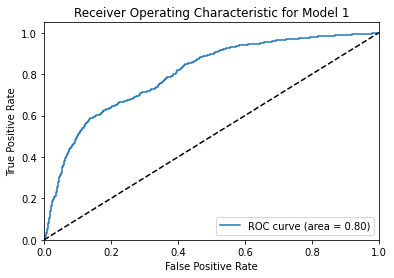

In [23]:
# AUC Score and ROC Curve for Model 1

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the probabilities of the positive class
y_prob1 = model1.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)

# Compute the AUC score
auc_score1 = roc_auc_score(y_test, y_prob1)

# Print the AUC score
print('AUC score for Model 1:', auc_score1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % auc_score1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model 1')
plt.legend(loc="lower right")
plt.show()


- Accuracy: The model's accuracy is 80%, meaning the model correctly predicted the class for 80% of all cases in the test data.

- Precision: The precision for class 0 is 0.82, which means that when the model predicts an instance is class 0, it's correct 82% of the time. The precision for class 1 is lower at 0.68, meaning the model is correct 68% of the time when it predicts an instance is class 1. In other words, the model is more reliable when predicting class 0 than class 1.

- AUC: 0.80, meaning 80% chance that the model will be able to distinguish between positive class and negative class. 

---

## Model 2: Applying SMOTE Resampling

In the Model 2, we will use a different sampling model, SMOTE. It is a method for increasing the number of cases in the dataset in a balanced way. SMOTE is used to overcome the problem of imbalance in datasets where the amount of data for different classes varies greatly. Since out dataset is an imbalanced one, we thought it can increase the performance of the model.

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model2 = LogisticRegression(random_state=0)
model2.fit(X_train_smote, y_train_smote)


# Predict on test set
y_pred2 = model2.predict(X_test)

# Evaluate model on SMOTE data
smote_scores = cross_val_score(model2, X_train_smote, y_train_smote, cv=5)
print(smote_scores.mean())

# Print performance metrics
print(classification_report(y_test, y_pred2))


# Print coefficients
coefficients2 = model2.coef_[0]
for i in range(len(X_train_smote.columns)):
    print(f"{X_train_smote.columns[i]}: {coefficients2[i]}")





0.7218753608668449
              precision    recall  f1-score   support

           0       0.88      0.66      0.75      2427
           1       0.44      0.76      0.56       876

    accuracy                           0.68      3303
   macro avg       0.66      0.71      0.66      3303
weighted avg       0.77      0.68      0.70      3303

age: 0.032041680323460636
turnover_A: 0.006160188317804609
turnover_B: -0.000474906945852198
lor_M: 0.038293826296828454
loyalty: -0.009344529568762744
prod_A: -0.5752283428252472
type_A: 0.3428136478315957
type_B: -0.8611724664298657
prod_B: -0.8239890055509586


AUC score for Model 2: 0.7939815206777633


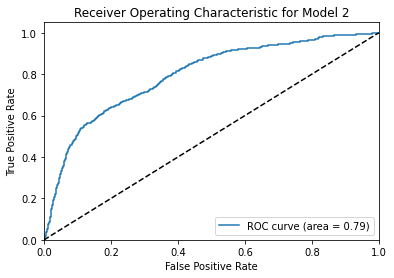

In [25]:
# AUC Score and ROC Curve for Model 1

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the probabilities of the positive class
y_prob2 = model2.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr1, tpr1, _ = roc_curve(y_test, y_prob2)

# Compute the AUC score
auc_score2 = roc_auc_score(y_test, y_prob2)

# Print the AUC score
print('AUC score for Model 2:', auc_score2)

# Plot the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % auc_score2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model 2')
plt.legend(loc="lower right")
plt.show()

- Precision for class 0 is quite high (0.88), meaning that when the model predicts an instance to be class 0, it's usually correct. However, for class 1, the precision is significantly lower (0.44).

- Accuracy of the model is 0.68, which means it correctly predicts the class for 68% of instances.

- The AUC score of 0.79 is a good score and suggests that the model does a good job at distinguishing between the positive class and the negative class.

## Model 3: Scaling Numerical Variables

In the Model 3. we will scale the numerical variables, which are in different ranges. Scaling can improve the performance of machine learning models. This is what we expect.

In [26]:
# Scale numerical features
scaler = StandardScaler()

# Transform the numerical variables
num_vars_scaled = pd.DataFrame(scaler.fit_transform(data[num_cols]), columns=num_cols)

# Recombine with categorical dummies
data_combined_scaled = pd.concat([num_vars_scaled, cat_vars_dummies], axis=1)

# Split into train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(data_combined_scaled, target, test_size=0.3, random_state=0)

# Fit the logistic regression model
model3 = LogisticRegression(random_state=0)
model3.fit(X_train_scaled, y_train_scaled)


# Perform 5-fold cross-validation
cv_scores3 = cross_val_score(model3, X_train_scaled, y_train_scaled, cv=5)
print('Average 5-Fold CV Score for Model 3:', np.mean(cv_scores3))

# Predict on the test set
y_pred3 = model3.predict(X_test_scaled)

# Print performance metrics
print(classification_report(y_test_scaled, y_pred3))

# Print coefficients
coefficients3 = model3.coef_[0]
for i in range(len(X_train_scaled.columns)):
    print(f"{X_train_scaled.columns[i]}: {coefficients3[i]}")


Average 5-Fold CV Score for Model 3: 0.7971447112264765
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2427
           1       0.72      0.43      0.54       876

    accuracy                           0.81      3303
   macro avg       0.77      0.69      0.71      3303
weighted avg       0.79      0.81      0.79      3303

age: 0.5352282587012585
turnover_A: 1.038062527282585
turnover_B: -1.0201329035163091
lor_M: 0.17309235572827564
loyalty: 0.00307218401652938
prod_A: -0.24849110306490207
type_A: -0.15211701812519335
type_B: -0.14886892682521718
prod_B: -0.28239086631551924


AUC score for Model 3: 0.8269049863314725


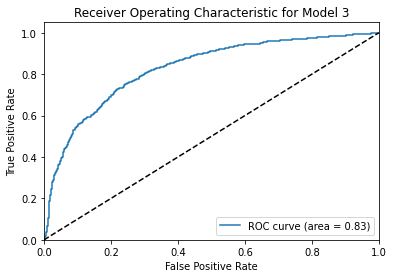

In [27]:
# AUC Score and ROC Curve for the Model 3

# Compute the probabilities of the positive class
y_prob3 = model3.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve
fpr3, tpr3, _ = roc_curve(y_test_scaled, y_prob3)

# Compute the AUC score
auc_score3 = roc_auc_score(y_test_scaled, y_prob3)

# Print the AUC score
print('AUC score for Model 3:', auc_score3)

# Plot the ROC curve
plt.figure()
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.2f)' % auc_score3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model 3')
plt.legend(loc="lower right")
plt.show()


- Precision for class 0 is 0.82, indicating that when the model predicts class 0, it is correct 82% of the time. For class 1, the precision is somewhat lower at 0.72.


- Accuracy of the model is 0.81, indicating that it correctly predicts the class for 81% of instances in the test set.

- The AUC score of 0.83 is fairly good.

## Model 4: Log-transformed Numerical Variables

In the Model 4, we will apply log-transformation to the numerical variables. We did not deal with the outliers before, since we thought they naturally emerged without a mistake and that there were not large number of outliers. We also avoid losing information by transforming data before. This time having a more normal distribution in the numerical variables can improve the model performence, since logistic regression can be sensitive to them.

In [28]:
num_vars_transformed = np.log1p(data[['age', 'turnover_A', 'turnover_B', 'lor_M' ]])

num_vars_transformed

,age,turnover_A,turnover_B,lor_M
0,4.204693,5.812820,5.582447,1.386294
1,3.828641,5.980747,5.655660,3.688879
2,3.761200,5.838258,7.070375,3.332205
3,3.465736,6.119765,5.494467,1.386294
4,4.143135,5.954742,5.662990,1.386294
...,...,...,...,...
11003,3.526361,5.714987,5.440069,3.332205
11004,3.178054,5.759749,5.435984,1.386294
11005,3.178054,5.958092,5.470864,3.332205
11006,3.496508,5.763870,5.428905,2.772589


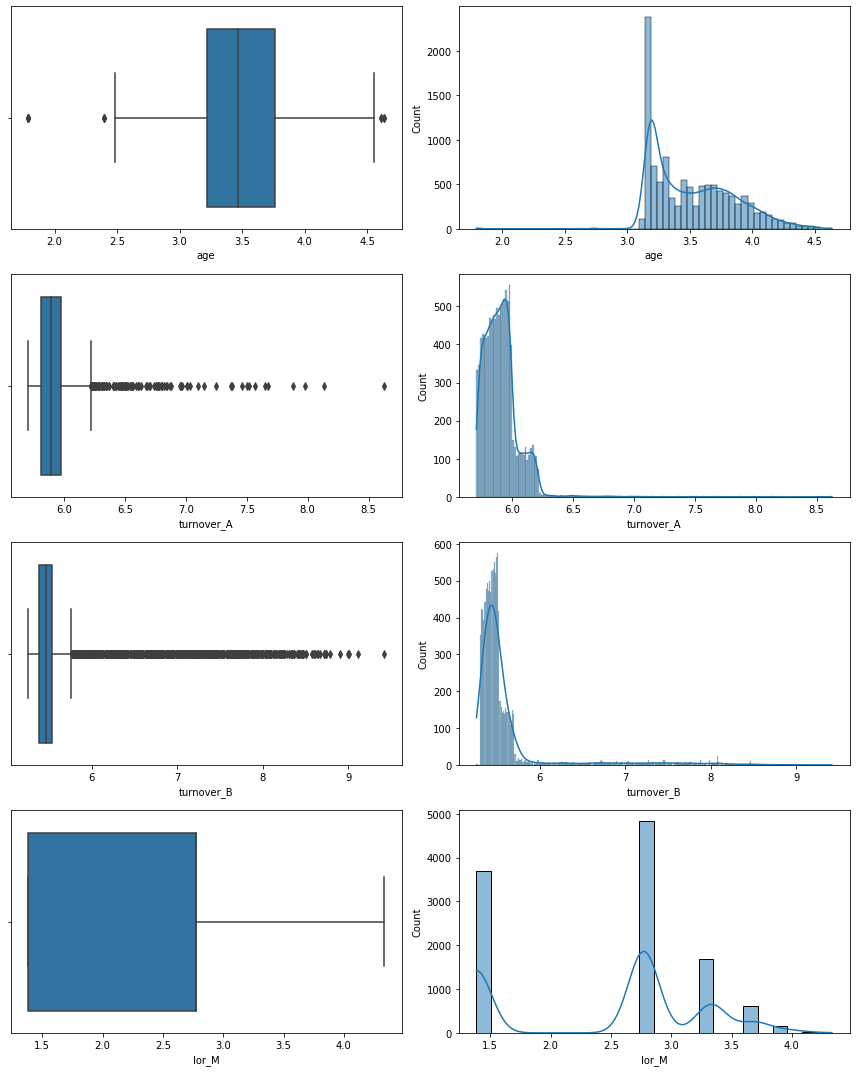

In [29]:
# Create subplots for box plots and histograms
fig, axes = plt.subplots(len(num_vars_transformed.columns), 2, figsize=(12, 15))

# Iterate over selected columns
for i, col in enumerate(num_vars_transformed):
    # Assigning a graph to each ax
    sns.boxplot(x = num_vars_transformed[col], ax=axes[i, 0])
    sns.histplot(data=num_vars_transformed, x=col, ax=axes[i, 1], kde=True)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [30]:
num_vars_transformed.apply(calculate_outlier_percentage)

age           0.127180
turnover_A    1.117369
turnover_B    8.693677
lor_M         0.000000
dtype: float64

Now we have a relatively more normal distribution and the percentage of outliers decreases, except turnover_B. This does not have to be a problem, since transformation can cause new outliers into data.

In [31]:
# Combine transformed numerical variables with dummy categorical variables
data_transformed = pd.concat([num_vars_transformed, cat_vars_dummies], axis=1)

# Split the dataset into training set and test set
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(
    data_transformed, target, test_size=0.3, random_state=0
)

# Create a Logistic Regression model
model4 = LogisticRegression(random_state=0)

# Fit the model
model4.fit(X_train_transformed, y_train_transformed)

# Perform 5-fold cross-validation and print the average accuracy
cv_scores4 = cross_val_score(model4, X_train_transformed, y_train_transformed, cv=5)
print(f"Average 5-Fold CV Score: {np.mean(cv_scores4)}")

# Predict on the test set
y_pred_transformed = model4.predict(X_test_transformed)

# Print performance metrics
print(classification_report(y_test_transformed, y_pred_transformed))

# Print coefficients
coefficients_transformed = model4.coef_[0]
for i in range(len(X_train_transformed.columns)):
    print(f"{X_train_transformed.columns[i]}: {coefficients_transformed[i]}")


Average 5-Fold CV Score: 0.7658663205710577
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2427
           1       0.67      0.44      0.53       876

    accuracy                           0.80      3303
   macro avg       0.75      0.68      0.70      3303
weighted avg       0.78      0.80      0.78      3303

age: 1.7040470969729424
turnover_A: 3.300692694158257
turnover_B: -1.043369721515318
lor_M: 0.8106394362652231
loyalty: -0.0019274060999902806
prod_A: -2.4473479395918756
type_A: 0.6892373303306153
type_B: 0.17910209559862292
prod_B: -3.2842832743571013


AUC score: 0.8080888896414575


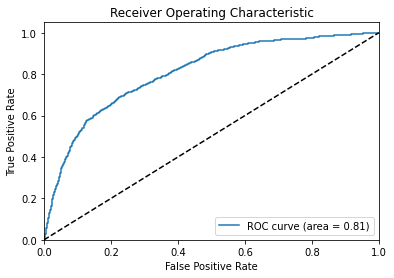

In [32]:
# Compute the probabilities of the positive class
y_prob_transformed = model4.predict_proba(X_test_transformed)[:, 1]

# Compute the ROC curve
fpr_transformed, tpr_transformed, _ = roc_curve(y_test_transformed, y_prob_transformed)

# Compute the AUC score
auc_score_transformed = roc_auc_score(y_test_transformed, y_prob_transformed)

# Print the AUC score
print('AUC score:', auc_score_transformed)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_transformed, tpr_transformed, label='ROC curve (area = %0.2f)' % auc_score_transformed)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


- Precision for class 0 is 0.82, meaning that when the model predicts an instance to be class 0, it's correct 82% of the time. For class 1, the precision is lower at 0.67.

- The overall accuracy of the model is 0.80, indicating that it correctly predicts the class for 80% of instances in the test set.

- The AUC score of 0.81 is a good score.

## Model 5 Extra: Applying Ensemble Methods (Stacking)

To imporve the logistic regression from Model - 1, we used stacking ensemble method. Stacking allows us to combine different types of models, such as tree-based models (e.g., Random Forest, Decision Trees) and non-tree-based models (e.g., Support Vector Machines, Logistic Regression). This flexibility allows us to capture different aspects of the data and benefit from the strengths of each model type. It can provide better predictive accuracy compared to using individual models alone. For the final stacked model, we used 'base_models' as 'estimators' and Logistic Regression as 'final_estimator'. The Final estimator took the predictions made by the base models and learned to make the final prediction based on those predictions. It was trained using the outputs of the base models along with the true labels.

In [33]:
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=0)),
    ('svc', SVC(probability=True, random_state=0)),
    ('dt', DecisionTreeClassifier(random_state=0))
]

# Initialize Stacking Classifier with the Meta Model
stacked_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Fit the model to our training data
stacked_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = stacked_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Access coefficients of the final estimator
coefficients_s = stacked_model.final_estimator_.coef_[0]

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2427
           1       0.89      0.71      0.79       876

    accuracy                           0.90      3303
   macro avg       0.90      0.84      0.86      3303
weighted avg       0.90      0.90      0.90      3303



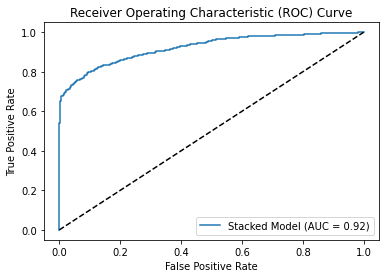

In [34]:
# Calculate the probability scores of each class
y_scores = stacked_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Stacked Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- Accuracy: The accuracy of the model is 90%, meaning the model correctly predicted the class for 90% of all cases in the test data.

- Precision: For the class 'N', the precision is 0.90, which means that 90% of the positive predictions for 'N' are correct. Similarly, for 'Y', the precision is 0.89, so 89% of the positive predictions for 'Y' are correct. This suggests that the model is quite good at not wrongly classifying a negative case as positive.

- AUC: 90 is a very high score, meaning model performs very well.

For "N" (not buying new product), the model achieves a precision of 0.90, indicating that 90% of the instances predicted as "N" are correct. The recall for "N" is 0.97, indicating that the model captures 97% of the actual "N" instances. The F1-score, which balances precision and recall, is 0.93 for "N". The support, which represents the number of instances in "N", is 2427. Similarly, for "Y" (buying new products), the precision is 0.89, recall is 0.71, F1-score is 0.79, and support is 876. The overall accuracy of the model is 0.90, meaning it predicts correctly for 90% of the instances. The macro average, which considers equal weight for each class, is 0.86, while the weighted average, which considers the class distribution, is 0.90.
The model shows promising performance, particularly for the existing customers who was not buying new products, but it may have some room for in capturing instances of buying a new product.

## Evaluation of the Models

Model 1:
Precision (Class 1): 0.68
Recall (Class 1): 0.43
F1-Score (Class 1): 0.53
Accuracy: 0.80
AUC: 0.80

Model 2:
Precision (Class 1): 0.44
Recall (Class 1): 0.76
F1-Score (Class 1): 0.56
Accuracy: 0.68
AUC: 0.79

Model 3:
Precision (Class 1): 0.72
Recall (Class 1): 0.43
F1-Score (Class 1): 0.54
Accuracy: 0.81
AUC: 0.83

Model 4:
Precision (Class 1): 0.67
Recall (Class 1): 0.44
F1-Score (Class 1): 0.53
Accuracy: 0.80
AUC: 0.81

Model 5:
Precision (Class 'Y'): 0.89
Recall (Class 'Y'): 0.71
F1-Score (Class 'Y'): 0.79
Accuracy: 0.90
AUC: 0.90


Since in evaluating the model performance business problem matters, we determine predicting 'True' (Yes) over 'False' ir preferred, because the project aims to increase the number of customers who will buy the product. Considering the metrics for class 1 (or 'Y') and overall performance, Model 5 is the best model among all. It has the highest precision, recall, and F1-score for predicting positive class ('Y'), which means it performs the best at identifying customers who will buy the product and when it predicts a customer will buy, it's most often correct. Also, Model 5 has the highest overall accuracy and AUC, suggesting it's best at distinguishing between positive and negative classes and correctly predicting the class for all instances.

After Model 5, the next best model is Model 3, which has the second highest precision for class 1 (0.72), although its recall is on the lower side (0.43). However, its overall accuracy (0.81) and AUC (0.83) are higher than the other remaining models, indicating a better overall performance.

Following Model 3, the third best model would be Model 1. It has a precision of 0.68 for class 1, which is lower than Model 3, but its recall for class 1 (0.43) is the same as Model 3. Model 1 also has an accuracy of 0.80 and AUC of 0.80, both of which are slightly lower than Model 3, but higher than the remaining models (Model 2 and Model 4).

This ranking of the models are also appropriate considering the fact that the dataset is imbalanced that its performance is better evaluated based on AUC score.

**Coefficients:**
age, turnover_A, and turnover_B are in general the most influential variables in predicitong the customer behavoir in our case. as age and amount of mone spend on product A increases, the more customer tends to buy the new product, while it is in inverse relationship with the amount of money spend on product B.

# Conclusion 

In conclusion, our project aims to leverage data analytics and logistic regression to predict customer product purchase in the health insurance industry. By understanding the factors that influence customer decision-making and developing an accurate predictive model, our client can make informed business decisions, optimize marketing strategies, and ultimately drive sales growth. Through this project, we aim to provide our client with actionable insights and a competitive advantage in the dynamic health insurance market. For that end, we have discovered that age and the money spendt on product A and B are th mosf effective factors in customers decision to buy the new product. 